# Analisa pelanggan pusat kebugaran

Waralaba pusat kebugaran bernama Model Fitness sedang mengembangkan strategi keterlibatan pelanggan berdasarkan data analitik.
Salah satu masalah yang paling sering dijumpai oleh layanan pusat kebugaran dan bahkan layanan lainnya adalah perputaran pelanggan atau *customer churn*. 
- Bagaimana cara Anda mengetahui bahwa pelanggan sudah berhenti menggunakan layanan Anda?

Anda memang bisa menghitung tingkat *churn* berdasarkan jumlah orang yang menghapus akun atau tidak memperbarui kontrak langganan mereka. Namun terkadang, Anda tidak bisa mengetahui dengan pasti apakah seorang klien benar-benar telah berhenti: mereka mungkin meninggalkan Anda tanpa sepengetahuan Anda.

Indikator *churn* bisa berbeda dari satu bidang ke bidang lainnya. Jika seorang pengguna membeli dari toko daring secara tidak rutin tetapi teratur, Anda tidak bisa mengatakan bahwa pengguna tersebut telah meninggalkan toko Anda. Akan tetapi, jika selama dua minggu pengguna tidak membuka kanal toko daring yang diperbarui setiap hari, barulah Anda bisa khawatir: pengikut Anda mungkin sudah bosan dan memutuskan untuk meninggalkan Anda.

Bagi bisnis pusat kebugaran, pelanggan akan dianggap pergi jika mereka tidak lagi kembali selama satu bulan. Padahal, hal itu belum tentu benar. Seorang pelanggan bisa saja tidak mengunjungi pusat kebugaran selama satu bulan karena dia sedang berlibur, misalnya ke Bali, dan akan kembali mengunjungi pusat kebugaran setelah liburan usai. Namun, kasus seperti ini memang jarang sekali terjadi. Biasanya, jika seorang pelanggan memutuskan untuk bergabung, kemudian datang beberapa kali lalu menghilang, kemungkinan besar mereka tidak akan kembali lagi.

Untuk mengurangi tingkat *churn*, Model Fitness telah melakukan digitalisasi terhadap sejumlah profil pelanggannya. Adapun tugas Anda adalah menganalisis profil para pelanggan tersebut dan mengembangkan strategi retensi pelanggan (*customer retention*).
<!-- 
memprediksi pelanggan churn atau tidak (supervised machine learning-klasifikasi biner, algoritme regresi logistik atau decision tree, tidak terdapat struktur waktu, confusion matrix, accuracy, precision & recall, f1_score, roc_auc) -->

<b>Objektif:</b>
- Menganalisis profil para pelanggan dan mengembangkan strategi retensi pelanggan (*customer retention*).

<b>Tahapan:</b><a id='back'></a>

1. [Ikhtisar Data](#Mulai)
2. [Pra-pemprosesan Data](#Pra-pemrosesan)
3. [*Exploratory Data Analysis*](#EDA)
    - [Kemungkinan adanya *outlier* pada fitur](#1)
    - [Korelasi antar fitur](#2)
4. [*Machine learning*](#ML)
    - [Model klasifikasi biner](#ML1)
    - [Membuat klaster pengguna](#ML2)
    - [Rekomendasi](#ML3)
5. [Kesimpulan Umum](#Kesimpulan)

In [1]:
# Memuat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pemisah dan skaler dataset 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Algoritme Supervised Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrik Supervised Machine Learning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Algoritme Unsupervised Machine Learning
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Metrik Unsupervised Machine Learning
from sklearn.metrics import silhouette_score

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

## Ikhtisar Data<a id='Mulai'></a>

In [2]:
# Memuat dataset
df = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\12 Project\\gym_churn_us.csv')

In [3]:
# Memeriksa informasi umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# Ukuran dataset
df.shape

(4000, 14)

In [5]:
# Sample data
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
# Memeriksa duplikat
df.duplicated().sum()

0

In [7]:
# Memeriksa nilai yang hilang
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Dokumentasi:
- `Churn` — *churn* aktual untuk bulan terkait, `0` berarti masih berlangganan dan `1` berarti sudah berhenti berlangganan

  Data pengguna untuk bulan sebelumnya:
- `gender` - jenis kelamin pelanggan, `0` berarti perempuan dan `1` berarti laki-laki
- `Near_Location` - apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran
- `Partner` - apakah pengguna adalah karyawan perusahaan mitra (pusat kebugaran ini memiliki perusahaan mitra dan para karyawannya mendapatkan diskon; dalam hal ini, pusat kebugaran menyimpan informasi tentang perusahaan tempat kerja pelanggan mereka)
- `Promo_friends` - apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka)
- `Phone` - apakah pengguna memberikan nomor telepon mereka
- `Age` - usia pelanggan
- `Lifetime` - waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran

  Data dari log kunjungan dan pembelian serta data terkait status keanggotaan saat ini:
- `Contract_period` - 1 bulan, 3 bulan, 6 bulan, atau 1 tahun
- `Month_to_end_contract` - sisa bulan sebelum kontrak berakhir
- `Group_visits` - apakah pengguna mengambil bagian dalam sesi kelompok
- `Avg_class_frequency_total` - frekuensi rata-rata kunjungan per minggu selama masa hidup pelanggan
- `Avg_class_frequency_current_month` - frekuensi rata-rata kunjungan per minggu selama bulan sebelumnya
- `Avg_additional_charges_total` - jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.

**Kesimpulan sementara**

- Semua tampak baik, hanya saja penamaan kolom bisa dirubah menjadi *snake case*.

[Kembali ke tahapan](#back)

## Pra-pemprosesan Data<a id='Pra-pemrosesan'></a>

In [8]:
# Memperbaiki nama kolom
df.columns = df.columns.str.lower()

# Memeriksa hasilnya
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

[Kembali ke tahapan](#back)

## *Exploratory Data Analysis*<a id='EDA'></a>

### Kemungkinan adanya *outlier* pada fitur<a id='1'></a>

In [9]:
# Deskripsi umum dataset
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Kemungkinan *outlier* pada kolom:
`contract_period`, `age`, `avg_additional_charges_total`, `month_to_end_contract`, `lifetime`, `avg_class_frequency_total`, `avg_class_frequency_current_month`.

In [10]:
# Rata-rata fitur berdasarkan kondisi pelanggan (churn atau tidak)
df.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Memeriksa fitur:
- `contract_period`,
- `age`,
- `avg_additional_charges_total`,
- `month_to_end_contract`,
- `lifetime`,
- `avg_class_frequency_total`,
- `avg_class_frequency_current_month`.

In [11]:
# Fungsi untuk menampilkan distribusi fitur
'''
Definisi:
-----------
    # Fungsi untuk menampilkan distribusi fitur
-----------
    dataset:
        data yang diinginkan
    h_col:
        nilai parameter hue pada sns.histogram
    which_col:
        kolom dari parameter yang diinginkan
    r_size:
        ukuran baris dari subplots
    c_size:
        ukuran kolom dari subplots
    f_size:
        ukuran setiap subplots
'''
def show_dist (dataset, h_col, which_col, r_size, c_size, f_size):
    
    # Membuat subplots dengan ukuran r_size x c_size
    fig, axs = plt.subplots(nrows=r_size, ncols=c_size, figsize=f_size)
    
    # Meratakan axs ke dalam array 1 dimensi
    axs = axs.flatten()
    
    # Fitur-fitur
    cols_to_check = which_col
    
    # Loop untuk setiap fitur dan menampilkan histogramnya
    for i, col in enumerate(cols_to_check):
        
        # Histogram
        sns.histplot(data=dataset, x=col, hue=h_col, kde=True, ax=axs[i], alpha=0.5, multiple='stack')
        
        # Judul histogram
        axs[i].set_title(col)
        
        # Judul x,y axis
        axs[i].set_xlabel('Nilai')
        axs[i].set_ylabel('Frekuensi')
    
    # Menyesuaikan jarak antar subplot secara otomatis
    plt.tight_layout()
    
    # Menampilkan hasilnya
    plt.show()

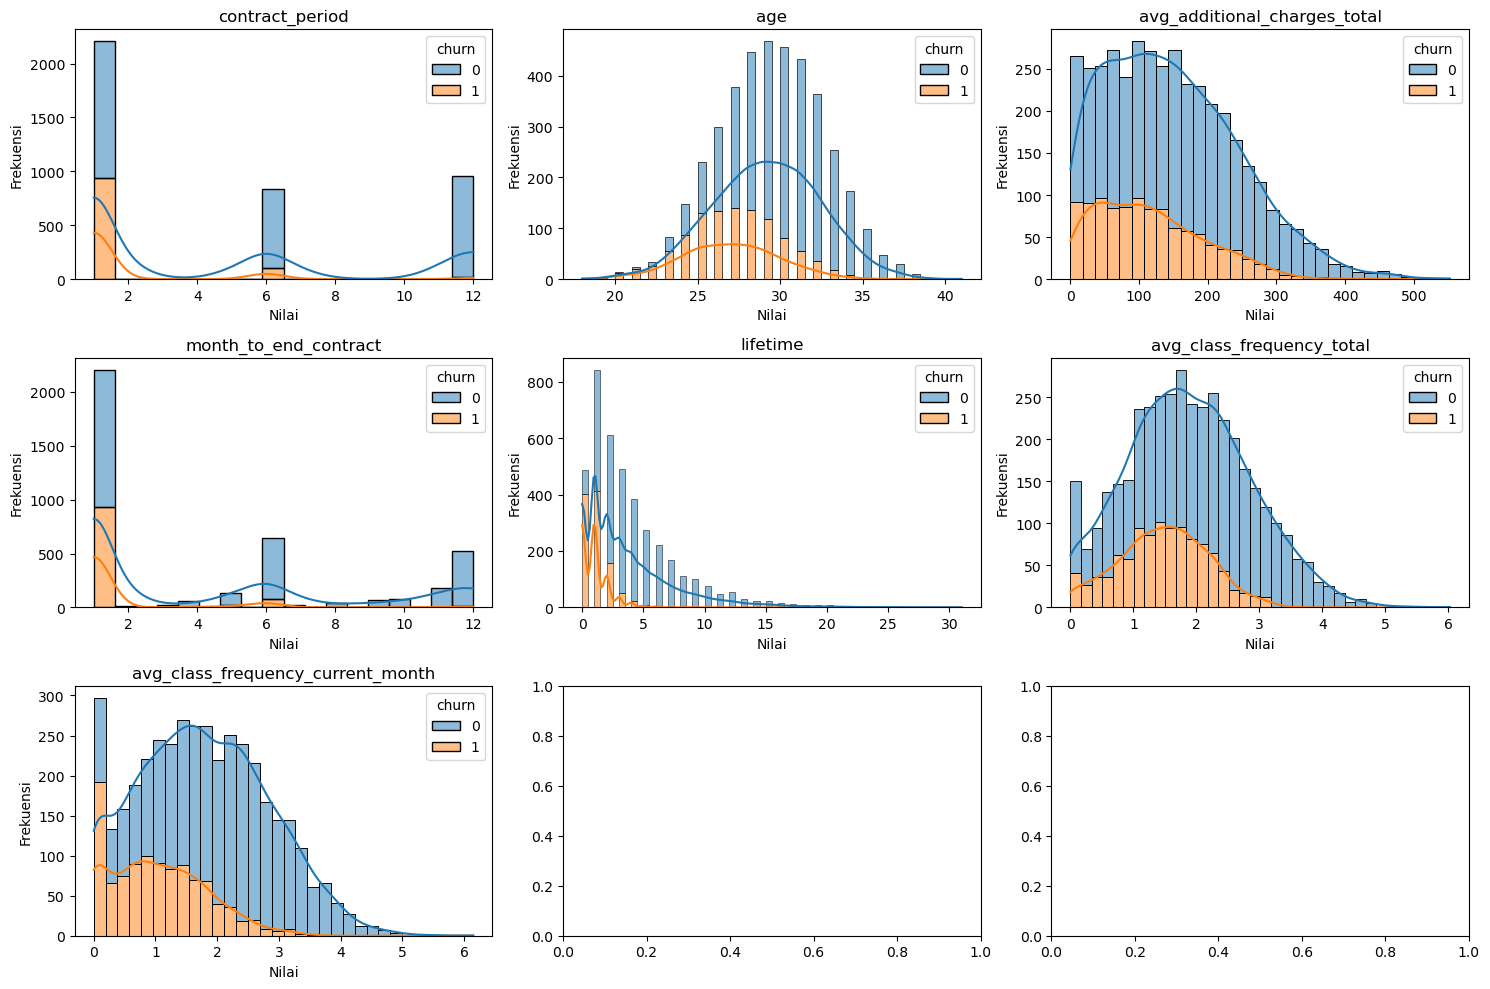

In [12]:
# Menjalankan fungsinya
show_dist(dataset = df,
          h_col = 'churn',
          which_col = ['contract_period', 'age', 'avg_additional_charges_total',
                       'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
                       'avg_class_frequency_current_month'],
          r_size = 3,
          c_size = 3,
          f_size = (15, 10))

Terbukti memang terdapat adanya kemiringan (*right skew*) atau outlier pada fitur:

`contract_period`, `avg_additional_charges_total`, `month_to_end_contract`, `lifetime`, `avg_class_frequency_total`, dan `avg_class_frequency_current_month`.

Namun tidak terbukti pada kolom `age`, yang mana distribusi datanya terlihat normal..

In [13]:
# Fungsi untuk menghapus outlier berdasarkan kolom
'''
Definisi:
-----------
    Fungsi ini untuk menghapus outlier berdasarkan kolom yang memiliki outlier
-----------
    data:
        data yang diinginkan
    column_name:
        kolom dari parameter yang diinginkan
'''
def remove_outlier (data, column_name):
    
    df_filter = data
    
    for col in column_name:
        
        # Menghitung Q1
        Q1 = data[col].quantile(0.25)
        # Menghitung Q3
        Q3 = data[col].quantile(0.75)
        
        # Menghitung IQR 
        IQR = Q3 - Q1
        
        # Menghitung lower dan upper wishkers
        minimum = Q1 - 1.5*IQR
        maximum = Q3 + 1.5*IQR
        
        # Filter baris berdasarkan upper wishkers dan lower wishkers
        df_filter = df_filter.loc[(df_filter[col] >= minimum) & (df_filter[col] <= maximum)]
    return df_filter

In [14]:
# Kolom outlier
cols_outlier = ['contract_period', 'avg_additional_charges_total', 'month_to_end_contract',
                'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

# Menghilangkan outlier dengan fungsi 'remove_outlier'
df_new = remove_outlier (data=df, column_name=cols_outlier)

In [15]:
# Kondisi awal dataset
df[cols_outlier].describe()

,contract_period,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,552.590740,12.000000,31.000000,6.023668,6.146783


In [16]:
# Kondisi setelah menghilangkan outlier pada dataset
df_new[cols_outlier].describe()

,contract_period,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000
mean,4.636122,143.839108,4.285790,3.141036,1.858491,1.739235
std,4.535006,92.644617,4.182172,2.690959,0.952885,1.036873
min,1.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,67.543391,1.000000,1.000000,1.170861,0.937431
50%,1.000000,134.101921,1.000000,2.000000,1.819659,1.695335
75%,6.000000,207.724898,6.000000,5.000000,2.513596,2.481915
max,12.000000,416.707175,12.000000,11.000000,4.565136,4.779963


[Kembali ke tahapan](#back)

### Korelasi antar fitur<a id='2'></a>

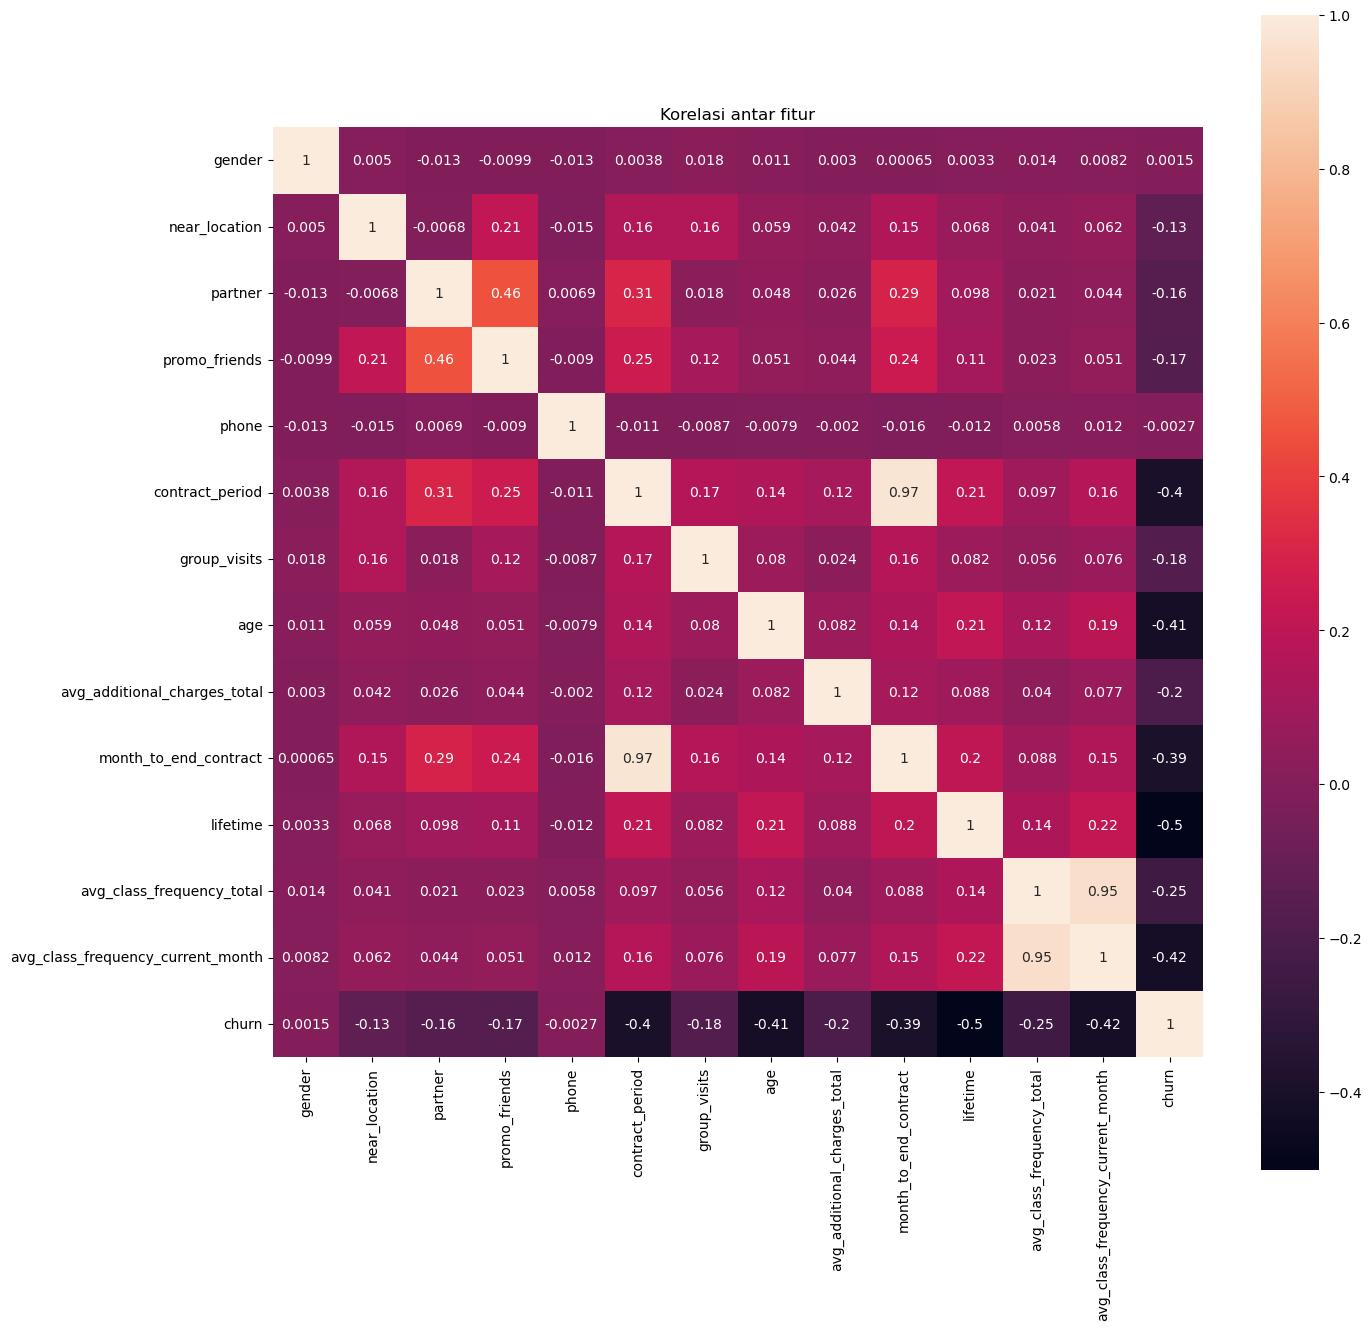

In [17]:
# Matriks korelasi
corr_m = df_new.corr()

# Membuat heatmap
plt.figure(figsize=(15, 15))

# Heatmap
sns.heatmap(corr_m, square=True, annot=True)

# Judul
plt.title('Korelasi antar fitur')

# Menampilkan hasilnya
plt.show()

Terdapat korelasi yang kuat antara `month_to_end_contract` dengan `contract_period`, kemudian `avg_class_frequency_current_month` dengan `avg_class_frequency_total`.

dan korelasi sedang pada fitur `promo_friends` dengan `partner`.

**Kesimpulan sementara**
1. Terdapat *outlier* pada beberapa fitur, dan berhasil dilakukan perbaikan pada fitur tersebut.
2. Terdapat korelasi yang kuat dan sedang pada fitur yang perlu diperhatikan sebelum pembuatan model *machine learning*.

[Kembali ke tahapan](#back)

## *Machine learning*<a id='ML'></a>

### Model klasifikasi biner<a id='ML1'></a>
Membangun model klasifikasi biner untuk memprediksi memprediksi probabilitas *churn* (untuk bulan berikutnya) bagi setiap pelanggan.

2 metode berikut akan digunakan:
   - regresi logistik, dan
   - random forest

Dan membandingkan metrik dari kedua model tersebut:
   - accuracy,
   - precision, dan
   - recall

#### Membagi dan standarisasi data

In [18]:
# Meninjau rasio antara kelas dataset
print('Rasio antar kelas:\n', df_new['churn'].value_counts())

Rasio antar kelas:
 0    2705
1    1060
Name: churn, dtype: int64


In [19]:
# Membagi datanya menjadi fitur (matriks X) dan variabel target (y)
X = df_new.drop('churn', axis=1)
y = df_new['churn']

In [20]:
# Membagi datanya menjadi training dan test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# Membuat objek kelas scaler
scaler = StandardScaler()

In [22]:
# Pembuat standarisasi training
scaler.fit(X_train)

# Mengubah dataset
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [23]:
# Memeriksa mean dan standar deviasi untuk setiap fitur sebelum dan sesudah standarisasi

# Data train sebelum standarisasi
X_train_before = pd.DataFrame(X_train, columns=X.columns)
print("Mean sebelum standarisasi:\n", X_train_before.mean())
print("\nStandar deviasi sebelum standarisasi:\n", X_train_before.std())

# Data train setelah standarisasi
X_train_after = pd.DataFrame(X_train_sc, columns=X.columns)
print("\nMean setelah standarisasi:\n", X_train_after.mean())
print("\nStandar deviasi setelah standarisasi:\n", X_train_after.std())

# Data test sebelum standarisasi
X_test_before = pd.DataFrame(X_test, columns=X.columns)
print("Mean sebelum standarisasi:\n", X_test_before.mean())
print("\nStandar deviasi sebelum standarisasi:\n", X_test_before.std())

# Data test setelah standarisasi
X_test_after = pd.DataFrame(X_test_sc, columns=X.columns)
print("\nMean setelah standarisasi:\n", X_test_after.mean())
print("\nStandar deviasi setelah standarisasi:\n", X_test_after.std())

Mean sebelum standarisasi:
 gender                                 0.510292
near_location                          0.852258
partner                                0.485060
promo_friends                          0.315737
phone                                  0.904714
contract_period                        4.637450
group_visits                           0.414675
age                                   29.168659
avg_additional_charges_total         144.143115
month_to_end_contract                  4.295817
lifetime                               3.164011
avg_class_frequency_total              1.868391
avg_class_frequency_current_month      1.748936
dtype: float64

Standar deviasi sebelum standarisasi:
 gender                                0.499977
near_location                         0.354903
partner                               0.499860
promo_friends                         0.464886
phone                                 0.293658
contract_period                       4.544481
group_visit

Karena ini tergolong kedalam klasifikasi biner, maka dapat diselesaikan atau diprediksi dengan menggunakan dua algoritme: `RegresiLogistik` dan `RandomForestRegressor`.

#### Regresi logistik

In [24]:
# Menentukan algoritme model 
lr_model = LogisticRegression()

# Melatih model
lr_model.fit(X_train_sc, y_train)

# Menggunakan model terlatih untuk membuat prediksi
predictions_lr = lr_model.predict(X_test_sc)
probabilities_lr = lr_model.predict_proba(X_test_sc)[:,1]

In [25]:
# Menampilkan metrik untuk mengevaluasi model
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_lr)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_lr)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_lr)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_lr)))

# Menampilkan skor ROC-AUC
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_lr)))

Accuracy: 0.91
Precision: 0.82
Recall: 0.86
F1: 0.84
ROC-AUC: 0.97


#### Random forest

In [26]:
# Menentukan algoritme model 
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)

# Melatih model
rf_model.fit(X_train_sc, y_train)

# Menggunakan model terlatih untuk membuat prediksi
predictions_rf = rf_model.predict(X_test_sc)
probabilities_rf = rf_model.predict_proba(X_test_sc)[:,1]

In [27]:
# Menampilkan metrik untuk mengevaluasi model
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_rf)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_rf)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_rf)))

# Menampilkan skor ROC-AUC
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_rf)))

Accuracy: 0.90
Precision: 0.83
Recall: 0.81
F1: 0.82
ROC-AUC: 0.96


**Kesimpulan sementara**

1. Pada metode regresi logistik, nilai *accuracy* sebesar 0.91, *precision* sebesar 0.82, dan *recall* sebesar 0.86. Sedangkan pada metode *random forest*, nilai *accuracy* sebesar 0.90, *precision* sebesar 0.83, dan *recall* sebesar 0.81.

2. Hasil dari skor F1 (rata-rata harmonis antara precision dan recall) untuk metode regresi logistik sebesar 0.84, lebih besar daripada metode *random forest* yaitu sebesar 0.82.

3. Berdasarkan hasil evaluasi ROC-AUC (*Area Under Curve* dan *Receiver Operating Characteristic*), kedua model yaitu Regresi Logistik dan Random Forest memberikan hasil yang cukup baik, namun model Regresi Logistik tampaknya memberikan hasil yang sedikit lebih baik (0.97) daripada model Random Forest (0.96). 

4. Hasil ROC-AUC tersebut mengindikasikan bahwa model Regresi Logistik lebih baik dalam mengklasifikasikan pelanggan yang akan *churn*. Sehingga dapat disimpulkan bahwa model Regresi Logistik memberikan hasil yang lebih baik daripada model Random Forest.

[Kembali ke tahapan](#back)

### Membuat klaster pengguna<a id='ML2'></a>

#### Model pengklasteran hierarki aglomeratif

In [28]:
# Melakukan standarisasi terhadap data fitur
X_sc = scaler.fit_transform(X)

In [29]:
# Menyimpan tabel dengan kumpulan objek yang ditautkan
linked = linkage(X_sc, method = 'ward')

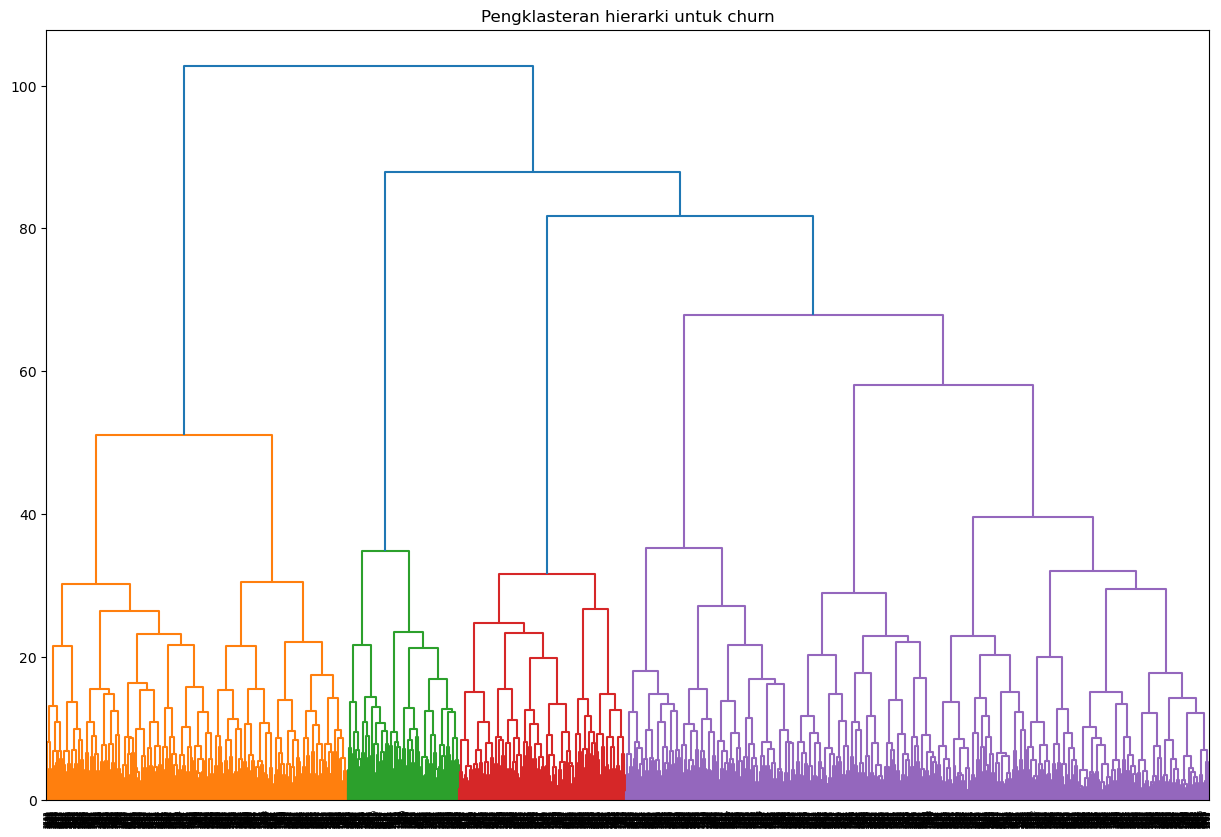

In [30]:
# Ukuran
plt.figure(figsize=(15, 10))

# Dendogram
dendrogram(linked, orientation='top')

# Judul
plt.title('Pengklasteran hierarki untuk churn')

# Menampilkan hasilnya
plt.show()

In [31]:
# Menentukan algoritme model dengan jumlah klaster = 4
km_model = KMeans(n_clusters=4)

# Melatih model
km_model.fit(X_sc)

# Melakukan prediksi klaster pelanggan
predicted_clusters = km_model.predict(X_sc)

In [32]:
# Menampilkan skor silhouette untuk pengklasteran
print('Skor silhouette: {:.2f}'.format(silhouette_score(X_sc, predicted_clusters)))

Skor silhouette: 0.13


#### Model *K-Means*

In [33]:
# Menyimpan label klaster ke kolom dataset
df_new['cluster_km'] = predicted_clusters

# Mendapatkan statistik nilai fitur rata-rata per klaster
df_new.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.534743,0.854985,0.338369,0.197382,1.0,2.353474,0.442095,30.052367,152.087839,2.198389,3.987915,2.671757,2.656939,0.097684
1,0.529086,0.858726,0.476454,0.321330,0.0,4.786704,0.421053,29.227147,144.396038,4.490305,3.238227,1.841555,1.701352,0.285319
2,0.500502,0.944835,0.779338,0.575727,1.0,10.718154,0.528586,29.892678,158.449607,9.790371,4.015045,1.984352,1.977096,0.029087
3,0.492221,0.756719,0.388260,0.195191,1.0,1.912306,0.295615,27.966761,127.602398,1.818246,1.905233,1.202945,0.936722,0.587694


**Klaster 0:**

Jika dilihat dari rata-rata nilai `contract_period`, `avg_additional_charges_total`, `lifetime` yang lebih rendah dari rata-rata klaster lainnya, menunjukkan bahwa pelanggan di klaster ini cenderung:
   - memiliki kontrak yang lebih pendek,
   - mengeluarkan lebih sedikit uang di gym,
   - pelanggan baru dan belum terlalu loyal.

Sesuai dengan beberapa kriteria tersebut nilai `churn` klaster ini menjadi yang tertinggi, yang menandakan pelanggan dengan kriteria tersebut cenderung berhenti berlanggan.

**Klaster 1:**

Jika dilihat dari rata-rata nilai `contract_period`, `avg_additional_charges_total`, `lifetime` yang lebih tinggi dari rata-rata klaster lainnya, menunjukkan bahwa pelanggan di klaster ini cenderung:
   - memiliki kontrak yang lebih lama,
   - mengeluarkan lebih banyak uang di gym,
   - pelanggan loyal dan mengunjungi gym dalam jangka waktu yang lebih lama.

Berkebalikan dengan klaster 0, nilai `churn` klaster ini menjadi yang terkecil, dan ini menunjukkan kriteria tersebut cenderung menjadi pelanggan yang tetap berlangganan. 

**Klaster 2:**

1. Rata-rata nilai `avg_class_frequency_total`, `avg_class_frequency_current_month` yang lebih tinggi dari rata-rata klaster lainnya, menunjukkan bahwa pelanggan di klaster ini cenderung lebih rajin berolahraga di gym.
2. Rata-rata nilai `avg_additional_charges_total` yang hampir sama dengan rata-rata klaster 1, menunjukkan bahwa pelanggan di klaster ini juga cenderung mengeluarkan jumlah uang yang sama di gym.
3. Rata-rata nilai `contract_period` tidak jauh berbeda dengan klaster 0, menunjukkan bahwa pelanggan di klaster ini cenderung memiliki kontrak yang lebih pendek.
4. Rata-rata nilai `lifetime` tidak jauh berbeda dengan klaster 1, menunjukkan bahwa pelanggan di klaster ini cenderung memiliki mengunjungi gym dalam jangka waktu yang lebih lama.

Klaster 2 memiliki beberapa hal yang membedakannya dari klaster lainnya, yaitu:
   - Cenderung memiliki frekuensi kunjungan ke gym yang tinggi, namun kontrak yang lebih pendek.
   - Dalam hal loyalitas pelanggan dan pengeluaran uang di gym mirip dengan klaster 1.

**Klaster 3:**

1. Pelanggan di klaster ini memiliki nilai `churn` yang lebih rendah dari klaster 0, menunjukkan bahwa pelanggan di klaster ini cenderung berhenti berlangganan gym, meskipun kemungkinannya tidak setinggi klaster 0.
2. Rata-rata nilai  `avg_additional_charges_total`, `lifetime` lebih rendah dari rata-rata klaster 1 dan 2, namun lebih tinggi dari rata-rata klaster 0, mengeluarkan lebih sedikit uang di gym, dan telah menjadi pelanggan selama beberapa waktu namun belum sepenuhnya loyal.
3. Pelanggan di klaster ini memiliki nilai `contract_period` lebih tinggi dari rata-rata klaster 0 dan 2, menunjukkan bahwa pelanggan di klaster ini memiliki kontrak yang sedang.
4. Rata-rata nilai `avg_class_frequency_total`, `avg_class_frequency_current_month` lebih rendah dari rata-rata klaster 2 dan 1, menunjukkan bahwa pelanggan di klaster ini masih cukup rajin berolahraga di gym, namun mungkin tidak seaktif pelanggan di klaster 2 dan 1.

Klaster 3 memiliki beberapa hal yang membedakannya dari klaster lainnya, yaitu:
   - Cenderung sudah menjadi pelanggan setia selama beberapa waktu, namun belum sepenuhnya loyal seperti pelanggan di klaster 1.
   - Celanggan cenderung mengeluarkan lebih sedikit uang di gym dibandingkan dengan pelanggan di klaster 1 dan 2, namun lebih banyak daripada pelanggan di klaster 0.
   - Pelanggan memiliki kontrak yang sedang, yang berarti cenderung lebih mempertimbangkan keputusan untuk berlangganan dalam jangka waktu yang sedang.

In [34]:
# Fungsi untuk membuat grafik dari fitur-fitur berpasangan untuk klaster
'''
Definisi:
-----------
    Fungsi untuk membuat grafik dari fitur-fitur berpasangan untuk klaster
-----------
    data:
        data yang diinginkan
    x_name:
        kolom dari fitur yang diinginkan
    y_name:
        kolom dari fitur yang diinginkan
    cluster_name:
        kolom yang berisi data klaster
'''
def show_clusters_on_plot(data, x_name, y_name, cluster_name):
    
    # Ukuran
    plt.figure(figsize = (10, 10))
    
    # Scatterplot
    sns.scatterplot(x=data[x_name], y=data[y_name],
           hue = data[cluster_name], palette = 'Paired'
       )
    
    # Judul
    plt.title('{} vs {}'.format(x_name, y_name))
    
    # Menampilkan hasilnya
    plt.show()

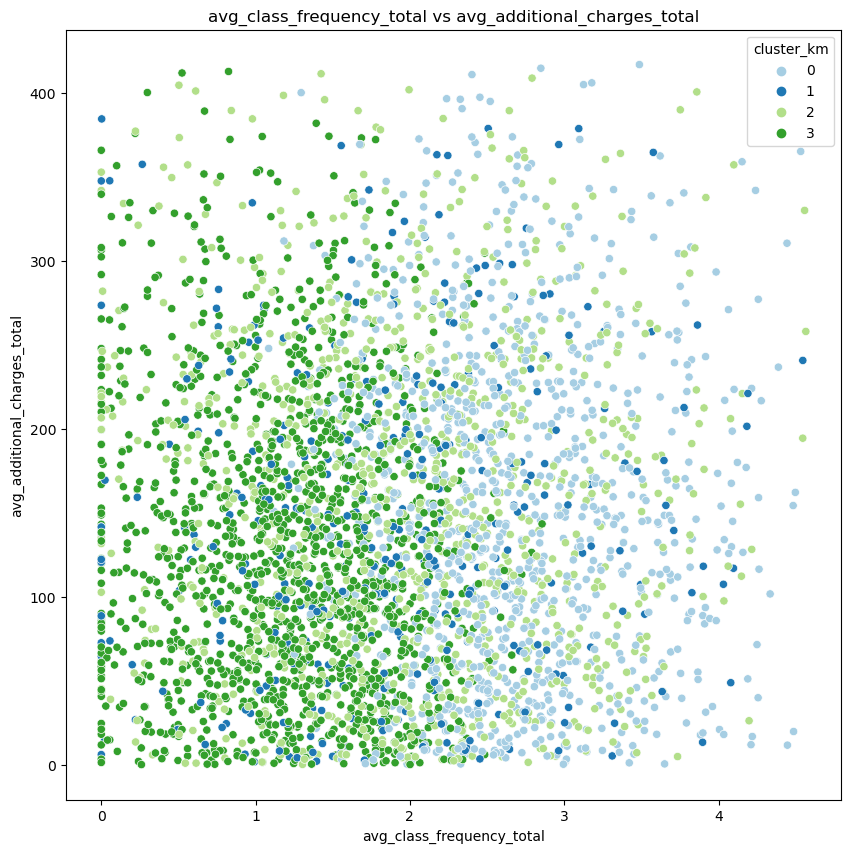

In [35]:
# Membuat grafik untuk pasangan fitur "avg_class_frequency_total" dan "avg_additional_charges_total"
show_clusters_on_plot(df_new, 'avg_class_frequency_total', 'avg_additional_charges_total', 'cluster_km')

Jika dilihat dari persebarannya berdasarkan frekuensi kunjungan pelanggan dengan jumlah total uang yang dikeluarkan,
- tidak memiliki kecenderungan yang konsisten pada setiap klaster, dan
- tidak ada klaster yang memiliki kecenderungan dominan pada salah satu sisi grafik.

Ini dapat diartikan bahwa tidak ada pola yang jelas antara frekuensi kunjungan pelanggan dan jumlah total uang yang dikeluarkan, sehingga masing-masing pelanggan mungkin memiliki preferensi yang berbeda dalam menghabiskan uang mereka di gym.

#### Distribusi fitur untuk setiap klasternya

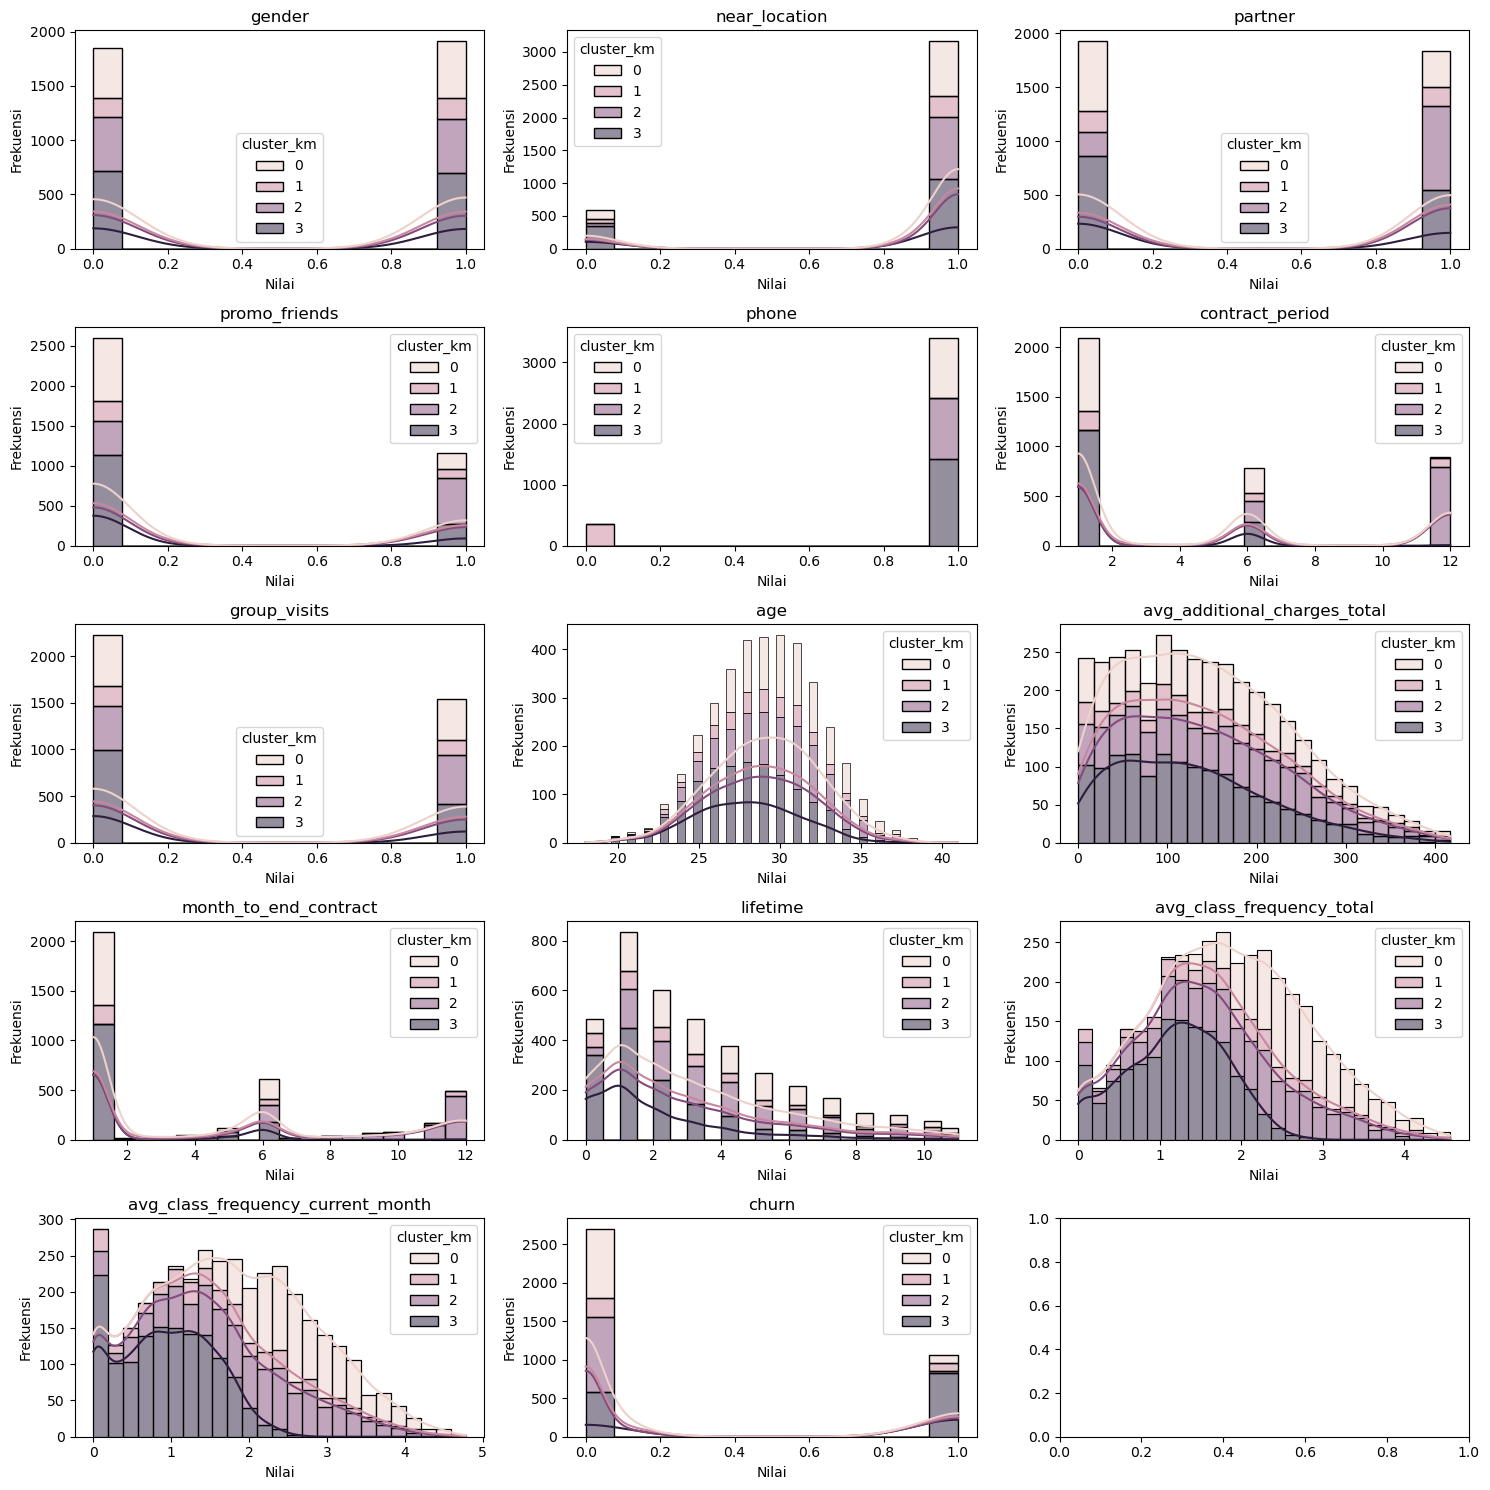

In [36]:
# Menjalankan fungsinya
show_dist(dataset = df_new,
          h_col = 'cluster_km',
          which_col = df_new.columns.drop('cluster_km'),
          r_size = 5,
          c_size = 3,
          f_size = (15, 15))

1. Berdasarkan kolom `lifetime`, diperoleh informasi bahwa pada semua klasternya terdapat *skewness* ke kanan. Hal ini menunjukkan bahwa mayoritas pelanggan gym memiliki masa aktif kurang dari rata-rata, dan terdapat sejumlah kecil pelanggan yang memiliki masa aktif yang cukup lama.

2. Berdasarkan kolom `avg_class_frequency_current_month`, diperoleh informasi bahwa klaster 0 dan 3 memiliki *skewness* ke kanan, sementara klaster 1 dan 2 memiliki distribusi yang cenderung normal. Hal ini menunjukkan bahwa mayoritas pelanggan dalam klaster 0 dan 3 kurang aktif dalam kunjungan ke gym, sedangkan pelanggan dalam klaster 1 dan 2 lebih aktif dalam mengikuti kelas gym.

3. Berdasarkan kolom `avg_additional_charges_total`, diperoleh informasi bahwa semua klasternya memiliki *skewness* ke kanan. Hal ini menunjukkan bahwa mayoritas pelanggan gym mengeluarkan jumlah uang yang relatif kecil, sementara terdapat sejumlah kecil pelanggan yang mengeluarkan jumlah uang yang cukup besar untuk layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.

#### Tingkat *churn* untuk setiap klaster

In [37]:
# Menghitung tingkat churn dan jumlah pelanggan pada masing-masing klaster
df_churn_cluster = df_new.groupby('cluster_km').agg({
    'churn': 'mean',
    'gender': 'count'
}).sort_values(by='churn', ascending=False)

# Mengubah nama kolom
df_churn_cluster = df_churn_cluster.rename(columns={'gender': 'count'})

# Menampilkan hasilnya
df_churn_cluster

,churn,count
cluster_km,,
3,0.587694,1414
1,0.285319,361
0,0.097684,993
2,0.029087,997


Terlihat bahwa tingkat *churn* (proporsi pelanggan yang pergi) berbeda-beda di setiap klaster. Klaster 0 memiliki tingkat *churn* yang sangat tinggi sebesar 59%, sementara klaster 1 memiliki tingkat *churn* yang paling rendah dengan hanya 3%.

Klaster pelanggan yang cenderung pergi adalah klaster 0, sedangkan yang cenderung tetap setia adalah klaster 1. Sedangkan untuk klaster lainnya, yaitu klaster 2 dan 3 memiliki tingkat *churn* yang cukup beragam dengan masing-masing proporsi 10% dan 26%.

**Kesimpulan sementara**

Dapat disimpulkan bahwa klaster pelanggan yang berbeda memiliki kecenderungan *churn* yang berbeda pula. Oleh karena itu, dapat dilakukan pendekatan pemasaran yang berbeda-beda untuk masing-masing klaster agar dapat mempertahankan pelanggan yang ada dan menurunkan tingkat *churn*.

[Kembali ke tahapan](#back)

### Rekomendasi<a id='ML3'></a>

Perusahaan perlu meningkatkan strategi interaksi dan retensi pelanggan untuk memperkuat hubungan dengan pelanggan dan meningkatkan loyalitas mereka terhadap merek.

Dalam hal ini, perusahaan dapat menerapkan beberapa prinsip pemasaran yang dapat membantu dalam meningkatkan interaksi dan retensi pelanggan, seperti:
1. Memberikan pelayanan yang berkualitas: Perusahaan dapat meningkatkan pengalaman pelanggan dengan memberikan pelayanan yang ramah, cepat, dan responsif. Sebagai contoh, perusahaan dapat memberikan waktu respons yang singkat pada pertanyaan atau keluhan pelanggan, serta memberikan layanan pelanggan yang personal untuk memberikan pengalaman yang lebih baik bagi pelanggan.

2. Memberikan insentif dan promosi yang menarik: Perusahaan dapat memberikan insentif dan promosi yang menarik untuk meningkatkan minat dan loyalitas pelanggan. Sebagai contoh, perusahaan dapat memberikan diskon atau hadiah bagi pelanggan yang sering berbelanja atau memberikan referensi, hal ini bisa diterapkan pada klaster 0 dan 3 yang memiliki tingkat *churn* yang tinggi.

3. Menerapkan program loyalitas: Perusahaan dapat mengembangkan program loyalitas yang menarik untuk meningkatkan retensi pelanggan. Sebagai contoh, perusahaan dapat memberikan poin atau penghargaan untuk setiap pembelian yang dilakukan pelanggan, yang dapat ditukar dengan produk atau hadiah lainnya, program ini bisa diterapkan pada klaster 2 dan 3 yang memiliki loyalitas yang tinggi.

Dengan menerapkan prinsip-prinsip tersebut, perusahaan dapat memperkuat hubungan dengan pelanggan dan meningkatkan loyalitas pelanggan terhadap merek, sehingga dapat meningkatkan kepuasan pelanggan dan meningkatkan pertumbuhan bisnis perusahaan.

[Kembali ke tahapan](#back)

## Kesimpulan Umum<a id='Kesimpulan'></a>

Setelah memeriksa dataset, memperbaiki penamaan kolom:
1. *Outlier* pada beberapa fitur berhasil diperbaiki,
2. Setelah melakukan pengecekan pada korelasi antar fitur, terdapat korelasi yang kuat dan sedang yang perlu diperhatikan sebelum membuat model *machine learning*
3. Logistik regresion dan *random forest* dipilih untuk mempelajari cara memprediksi probabilitas *churn* (untuk bulan berikutnya) bagi setiap pelanggan
4. Kemudian membuat segmentasi pengguna dengan memilih kelompok yang paling dominan, dalam hal ini klaster 0 menjadi yang paling dominan, pengguna pada klaster ini cenderung memiliki kontrak yang lebih pendek, mengeluarkan lebih sedikit uang di gym, pelanggan baru dan belum terlalu loyal.
5. Menerapkan beberapa prinsip pemasaran yang dapat membantu dalam meningkatkan interaksi dan retensi pelanggan, seperti memberikan pelayanan yang berkualitas, memberikan insentif dan promosi yang menarik, dan menerapkan program loyalitas.

[Kembali ke tahapan](#back)